In [77]:
import os

In [78]:
import numpy as np

In [79]:
import pandas as pd

In [80]:
import numpy as np, pandas as pd

In [81]:
import matplotlib.pyplot as plt

In [82]:
pip install sklearn

Note: you may need to restart the kernel to use updated packages.


In [83]:
from sklearn.cluster import KMeans

In [84]:
df = pd.read_csv("D:\DATASETS ML\predictive_maintenance.csv")
df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure


In [85]:
df_numeric = df.select_dtypes(include=[np.number])
numeric_cols = df_numeric.columns.values

In [86]:
df_non_numeric = df.select_dtypes(exclude=[np.number])
non_numeric_cols = df_non_numeric.columns.values

In [87]:
values_list = list()
cols_list = list()
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())*100
    cols_list.append(col)
    values_list.append(pct_missing)
pct_missing_df = pd.DataFrame()
pct_missing_df['col'] = cols_list
pct_missing_df['pct_missing'] = values_list

In [88]:
less_missing_values_cols_list = list(pct_missing_df.loc[(pct_missing_df.pct_missing < 0.5) & (pct_missing_df.pct_missing > 0), 'col'].values)
df.dropna(subset=less_missing_values_cols_list, inplace=True)

In [89]:
_40_pct_missing_cols_list = list(pct_missing_df.loc[pct_missing_df.pct_missing > 40, 'col'].values)
df.drop(columns=_40_pct_missing_cols_list, inplace=True)

In [90]:
df_numeric = df.select_dtypes(include=[np.number])
numeric_cols = df_numeric.columns.values
for col in numeric_cols:
    missing = df[col].isnull()
    num_missing = np.sum(missing)
    if num_missing > 0:  # impute values only for columns that have missing values
        med = df[col].median() #impute with the median
        df[col] = df[col].fillna(med)

In [91]:
df_non_numeric = df.select_dtypes(exclude=[np.number])
non_numeric_cols = df_non_numeric.columns.values
for col in non_numeric_cols:
    missing = df[col].isnull()
    num_missing = np.sum(missing)
    if num_missing > 0:  # impute values only for columns that have missing values
        mod = df[col].describe()['top'] # impute with the most frequently occuring value
        df[col] = df[col].fillna(mod)

In [92]:
df.isnull().sum().sum()

0

In [93]:
df.Target.describe()

count    10000.000000
mean         0.033900
std          0.180981
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Target, dtype: float64

In [96]:
cols_other_than_id = list(df.columns)[1:]
df.drop_duplicates(subset=cols_other_than_id, inplace=True)

In [97]:
df.Target.dtype

dtype('int64')

In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Target                   10000 non-null  int64  
 9   Failure Type             10000 non-null  object 
dtypes: float64(3), int64(4), object(3)
memory usage: 859.4+ KB


In [99]:
df['Target'],class_names = pd.factorize(df['Target'])

In [100]:
print(class_names)
print(df['Target'].unique())

Int64Index([0, 1], dtype='int64')
[0 1]


In [101]:
df['UDI'],_ = pd.factorize(df['UDI'])
df['Product ID'],_ = pd.factorize(df['Product ID'])
df['Type'],_ = pd.factorize(df['Type'])
df['Air temperature [K]'],_ = pd.factorize(df['Air temperature [K]'])
df['Process temperature [K]'],_ = pd.factorize(df['Process temperature [K]'])
df['Rotational speed [rpm]'],_ = pd.factorize(df['Rotational speed [rpm]'])
df['Torque [Nm]'],_ = pd.factorize(df['Torque [Nm]'])
df['Tool wear [min]'],_ = pd.factorize(df['Tool wear [min]'])
df['Target'],_ = pd.factorize(df['Target'])
df['Failure Type'],_ = pd.factorize(df['Failure Type'])
df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,0,0,0,0,0,0,0,0,0,0
1,1,1,1,1,1,1,1,1,0,0
2,2,2,1,0,2,2,2,2,0,0
3,3,3,1,1,0,3,3,3,0,0
4,4,4,1,1,1,1,4,4,0,0


In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   UDI                      10000 non-null  int64
 1   Product ID               10000 non-null  int64
 2   Type                     10000 non-null  int64
 3   Air temperature [K]      10000 non-null  int64
 4   Process temperature [K]  10000 non-null  int64
 5   Rotational speed [rpm]   10000 non-null  int64
 6   Torque [Nm]              10000 non-null  int64
 7   Tool wear [min]          10000 non-null  int64
 8   Target                   10000 non-null  int64
 9   Failure Type             10000 non-null  int64
dtypes: int64(10)
memory usage: 859.4 KB


In [103]:
X = df
y = df.iloc[:,-1]

In [104]:
model = KMeans(n_clusters=4,random_state=123)
model.fit(X)

C:\Users\AMITH\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=4, random_state=123)

In [105]:
model.cluster_centers_

array([[6.25600000e+03, 6.25600000e+03, 7.80409474e-01, 6.19405861e+01,
        5.14893617e+01, 3.00492975e+02, 2.03711762e+02, 1.11130871e+02,
        1.96708149e-02, 5.01806503e-02],
       [1.25700040e+03, 1.25700040e+03, 8.17892644e-01, 1.66059642e+01,
        1.47113320e+01, 2.44173360e+02, 1.79750696e+02, 1.06658052e+02,
        2.58449304e-02, 5.40755467e-02],
       [8.75050000e+03, 8.75050000e+03, 8.13050440e-01, 2.29523619e+01,
        2.73907126e+01, 2.96434347e+02, 2.04182546e+02, 1.09449960e+02,
        2.20176141e-02, 4.72377902e-02],
       [3.76249960e+03, 3.76249960e+03, 7.90865385e-01, 6.36774840e+01,
        3.84439103e+01, 3.05000401e+02, 2.01413462e+02, 1.08209135e+02,
        6.81089744e-02, 2.69230769e-01]])

In [106]:
model.inertia_

11038570069.205616

In [107]:
labels = model.labels_
correct_labels = sum(y == labels)
print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))

Result: 2499 out of 10000 samples were correctly labeled.


k:  1
k:  2
k:  3
k:  4
k:  5
k:  6
k:  7
k:  8
k:  9


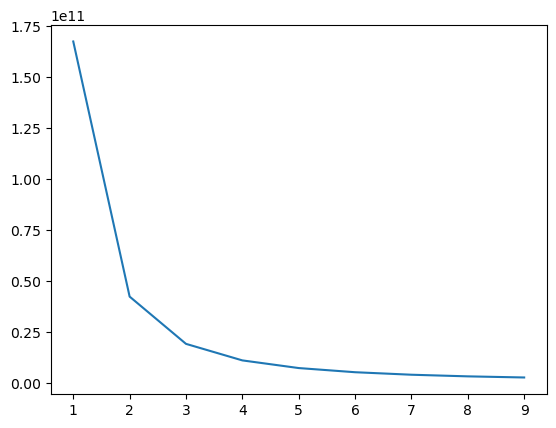

In [108]:
from mpl_toolkits.mplot3d import Axes3D

def elbow_plot(data, maxK=40, seed_centroids=None):
    """
        parameters:
        - data: pandas DataFrame (data to be fitted)
        - maxK (default = 10): integer (maximum number of clusters with which to run k-means)
        - seed_centroids (default = None ): float (initial value of centroids for k-means)
    """
    sse = {}
    for k in range(1, maxK):
        print("k: ", k)
        if seed_centroids is not None:
            seeds = seed_centroids.head(k)
            kmeans = KMeans(n_clusters=k, max_iter=500, n_init=100, random_state=0, init=np.reshape(seeds, (k,1))).fit(data)
            data["clusters"] = kmeans.labels_
        else:
            kmeans = KMeans(n_clusters=k, max_iter=300, n_init=100, random_state=0).fit(data)
            data["clusters"] = kmeans.labels_
        # Inertia: Sum of distances of samples to their closest cluster center
        sse[k] = kmeans.inertia_
    plt.figure()
    plt.plot(list(sse.keys()), list(sse.values()))
    plt.show()
    return

elbow_plot(X, maxK=10)

In [112]:
model = KMeans(n_clusters=1,random_state=123)
model.fit(X)
labels = model.labels_
# check how many of the samples were correctly labeled
correct_labels = sum(y == labels)

print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))
print("correct %.02f classification " % (correct_labels/float(y.size)))

C:\Users\AMITH\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Result: 9652 out of 10000 samples were correctly labeled.
correct 0.97 classification 


In [2]:
!pip install pandas


In [3]:
import pandas as pd


In [14]:
import numpy as np
import pandas as pd
!pip install sklearn
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score

# Load the dataset
df = pd.read_csv("D:\ML project\DATASETS ML\predictive_maintenance.csv")

# Preprocess the dataset
df['UDI'], _ = pd.factorize(df['UDI'])
df['Product ID'], _ = pd.factorize(df['Product ID'])
df['Type'], _ = pd.factorize(df['Type'])
df['Air temperature [K]'], _ = pd.factorize(df['Air temperature [K]'])
df['Process temperature [K]'], _ = pd.factorize(df['Process temperature [K]'])
df['Rotational speed [rpm]'], _ = pd.factorize(df['Rotational speed [rpm]'])
df['Torque [Nm]'], _ = pd.factorize(df['Torque [Nm]'])
df['Tool wear [min]'], _ = pd.factorize(df['Tool wear [min]'])
df['Target'], _ = pd.factorize(df['Target'])
df['Failure Type'], _ = pd.factorize(df['Failure Type'])

# Define features and target
X = df.drop(columns=['Target'])
y = df['Target']

# Create and fit KMeans model
model = KMeans(n_clusters=2, random_state=123)
model.fit(X)
labels = model.labels_

# Create a DataFrame with the results
results = pd.DataFrame({
    'Vehicle_ID': df['UDI'],  # Assuming 'UDI' is the vehicle identifier
    'Actual': y,
    'KMeans_Prediction': labels
})

# Define a function to decide if a vehicle needs maintenance based on the cluster
def needs_maintenance(cluster_label):
    # Simple rule: Assume cluster 0 means no maintenance, cluster 1 means maintenance
    return 1 if cluster_label == 1 else 0

results['Service_Needed'] = results['KMeans_Prediction'].apply(needs_maintenance)

# Print the results with the maintenance decision
print(results.head())  # Print only the first few rows for brevity

# Print detailed maintenance decision for each vehicle
for index, row in results.iterrows():
    service_needed = 'needs service' if row['Service_Needed'] == 1 else 'does not need service'
    print(f"Vehicle ID {row['Vehicle_ID']} {service_needed}")

# Calculate the accuracy of the maintenance prediction
print("Maintenance Prediction Accuracy: ", accuracy_score(results['Actual'], results['Service_Needed']))


C:\Users\AMITH\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


   Vehicle_ID  Actual  KMeans_Prediction  Service_Needed
0           0       0                  1               1
1           1       0                  1               1
2           2       0                  1               1
3           3       0                  1               1
4           4       0                  1               1
Vehicle ID 0 needs service
Vehicle ID 1 needs service
Vehicle ID 2 needs service
Vehicle ID 3 needs service
Vehicle ID 4 needs service
Vehicle ID 5 needs service
Vehicle ID 6 needs service
Vehicle ID 7 needs service
Vehicle ID 8 needs service
Vehicle ID 9 needs service
Vehicle ID 10 needs service
Vehicle ID 11 needs service
Vehicle ID 12 needs service
Vehicle ID 13 needs service
Vehicle ID 14 needs service
Vehicle ID 15 needs service
Vehicle ID 16 needs service
Vehicle ID 17 needs service
Vehicle ID 18 needs service
Vehicle ID 19 needs service
Vehicle ID 20 needs service
Vehicle ID 21 needs service
Vehicle ID 22 needs service
Vehicle ID 23 needs serv